In [1]:
n = 10 #the number of vertices in the phenotype tree
parents = [1, 1, 3, 3, 4, 4, 5, 5, 5] #the parent identifiers for the vertices
info = [5, 7, 8, 13, 18, 14, 15, 21, 20, 29] #information content
m = 2 #number of diseases
desc_d = [[2, 4, 2],[1, 10]] #contain descriptions of diseases. Note first item is the no. of descrition
l = 4 #number of patients
desc_p = [[3, 5, 9, 8],[1, 6],[2, 7, 10],[1, 10]] #descriptions of patiens

In [2]:
import networkx as nx

In [3]:
# create empty graph object
# must use directed graph in order to use LCA algorithmn in NX
G = nx.DiGraph()

## Create Tree

In [4]:
# initialize root
G.add_node(1)

In [5]:
%%time
# create edges
edges = []
for i, j in zip(parents,range(2,n+1)):
    edges.append((i,j))
edges

CPU times: user 59 µs, sys: 11 µs, total: 70 µs
Wall time: 86.8 µs


[(1, 2), (1, 3), (3, 4), (3, 5), (4, 6), (4, 7), (5, 8), (5, 9), (5, 10)]

In [6]:
%%time
# create tree graph
G.add_edges_from(edges)

CPU times: user 146 µs, sys: 27 µs, total: 173 µs
Wall time: 207 µs


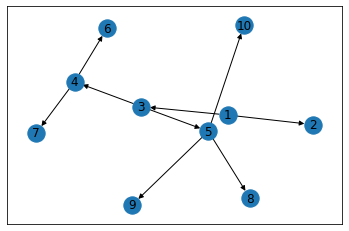

In [7]:
# draw graph
import matplotlib.pyplot as plt
nx.draw_networkx(G)

# Task

1. for each patient, each disease, find their lowest common ancestor LCA(q,d)

2. for each patient description for one patient, pair it with each disease description for one disease

3. find the LCA of the pair

4. find the max IC of the LCA

5. do it for every patient description, sum up, this is the score of this disease

6. repeat for another disease

7. compair the disease scores, maximum score is the result disease



In [8]:
# create info dictionary
infod = {}

In [9]:
for i , j in enumerate(info):
    infod[i+1] = j

In [10]:
infod

{1: 5, 2: 7, 3: 8, 4: 13, 5: 18, 6: 14, 7: 15, 8: 21, 9: 20, 10: 29}

In [11]:
# disease score
d_scores = []
# result output
result = []
# create score
score = 0
# create minimum
maxim = 0

In [12]:
# function generator to optimize loop
def product(a, b):
    for i in a:
        for j in b:
            yield i, j

In [13]:
# SKIP IC calculation
# Use generator

# loop through patients
for i in range(1,l+1):
    d_scores = []
    # loop through diseases
    for j in range(1, m+1):
        score = 0
        for d, q in product(desc_p[i-1][1:], desc_d[j-1][1:]):
            anc = nx.algorithms.lowest_common_ancestor(G, q, d)
            score += anc
            print('max score is : ',maxim, score)
        d_scores.append(score)
        print('d_scores',d_scores)
    disease = d_scores.index(max(d_scores)) +1
    result.append(str(disease) + '\n')
    print('disease is :', disease)

max score is :  0 3
max score is :  0 4
max score is :  0 7
max score is :  0 8
max score is :  0 11
max score is :  0 12
d_scores [12]
max score is :  0 5
max score is :  0 10
max score is :  0 15
d_scores [12, 15]
disease is : 2
max score is :  0 4
max score is :  0 5
d_scores [5]
max score is :  0 3
d_scores [5, 3]
disease is : 1
max score is :  0 4
max score is :  0 5
max score is :  0 8
max score is :  0 9
d_scores [9]
max score is :  0 3
max score is :  0 13
d_scores [9, 13]
disease is : 2
max score is :  0 3
max score is :  0 4
d_scores [4]
max score is :  0 10
d_scores [4, 10]
disease is : 2


In [ ]:
# loop through patients
for i in range(1,l+1):
    d_scores = []
    # loop through diseases
    for j in range(1, m+1):
        score = 0
        # loop through patient descriptions
        # skip first item, which is no. of desc
        for d in desc_p[i-1][1:]:
            maxim = 0
            print(d)
            # loop through disease descriptions:
            # skip first item, same reason as above
            for q in desc_d[j-1][1:]:
                print(q)
                # find LCA(q,d)
                anc = nx.algorithms.lowest_common_ancestor(G, q, d)                       
                info_ = infod[anc]
                print('LCA is :', anc, info_)
                # find max(IC(LCA(q,d)))
                if info_ >= maxim:
                    maxim = info_
            score += maxim
            print('max score is : ',maxim, score)
        d_scores.append(score)
        print('d_scores',d_scores)
    disease = d_scores.index(max(d_scores)) +1
    result.append(str(disease) + '\n')
    print('disease is :', disease)

In [14]:
result

['2\n', '1\n', '2\n', '2\n']